0.00104804592921
0.00247672920055


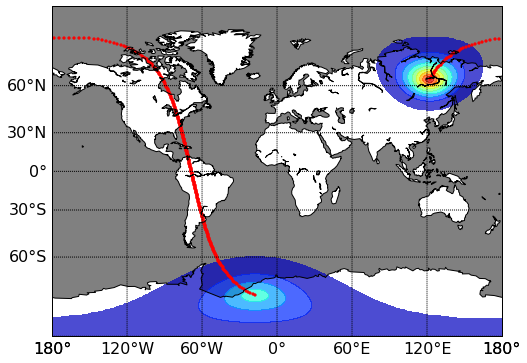

In [18]:
# Plot weighting function:
import numpy as np
import pickle
#from build_database import flux_obj
#from scipy import interpolate
from matplotlib import pyplot as plt
from GLD_file_tools import GLD_file_tools
from satellite import Satellite
import datetime
import ephem
from coordinate_structure import coordinate_structure
from coordinate_structure import transform_coords
from longitude_scaling import longitude_scaling
#from ionoAbsorp import ionoAbsorp
import os
from mpl_toolkits.basemap import Basemap
from precip_model import precip_model
from measurement_model import measurement_model
import itertools
import random
import matplotlib.tri as mtri
import matplotlib as mpl
from fluxMDP import get_map_scaling, get_time_scaling
from coordinate_structure import coordinate_structure


%matplotlib inline


# --------------- Latex Plot Beautification --------------------------
fig_width_pt = 450.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width+1,fig_height+1]
params = {'backend': 'ps',
          'axes.labelsize': 16,
          'font.size': 16,
          'legend.fontsize': 16,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12,
          'text.usetex': False,
          'figure.figsize': fig_size,
          'figure.autolayout': False,
          'figure.subplot.left': 0.04,
          'figure.subplot.bottom':0.05,
          'figure.subplot.top':0.995,
          'figure.subplot.right':0.995}
plt.rcParams.update(params)
# --------------- Latex Plot Beautification --------------------------

curtime = datetime.datetime(2015,11,1,1,48,0)
endtime = curtime + datetime.timedelta(minutes=53)

gLons = np.linspace(-180,180,360)
gLats = np.linspace(-90, 90, 180)



traj = []

sat_TLE  = ["1 40378U 15003C   15293.75287141  .00010129  00000-0  48835-3 0  9990",
            "2 40378  99.1043 350.5299 0153633 201.4233 158.0516 15.09095095 39471"]

# Satellite object:
sat = Satellite(sat_TLE[0], sat_TLE[1],'Firebird 4')

sat.compute(curtime)

Winit = np.array(get_map_scaling(gLats, gLons, sat.coords,Rmax=2000))



while curtime < endtime:
    sat.compute(curtime)    
    traj.append([sat.coords.lon(),sat.coords.lat()])
    curtime += datetime.timedelta(seconds=10)

traj = np.array(traj)
# print np.shape(traj)
# print traj[:,0]




Wfinal = np.array(get_map_scaling(gLats, gLons, sat.coords,Rmax=2000))
#plt.pcolor(gLons, gLats, W)
# print np.shape(W)
# print np.shape(gLons)


rLon, rLat = np.meshgrid(gLons,gLats)


f, ax = plt.subplots(1,1)
m = Basemap(projection='mill',lon_0=0,ax=ax)

sx,sy = m(traj[:,0],traj[:,1])

clevs = np.linspace(1e-6,np.max([Winit, Wfinal]),10)
print np.max(Winit)
print np.max(Wfinal)
m.drawcoastlines(color='k',linewidth=1,ax=ax)
m.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0])
m.drawmeridians(np.arange(m.lonmin,m.lonmax+30,60),labels=[0,0,0,1])
m.drawmapboundary(fill_color='grey')
m.fillcontinents(color='white',lake_color='grey',zorder=0)
m.contourf(rLon, rLat, Wfinal,clevs, latlon=True,alpha=0.7)
m.contourf(rLon, rLat, Winit, clevs, latlon=True,alpha=0.7)

m.scatter(sx,sy,color='r',marker='.')
#ax.set_title('Total flux \n%s '% (plottime - datetime.timedelta(seconds=tt)))
#cax,kw = mpl.colorbar.make_axes(ax)
#plt.tight_layout()
plt.savefig('weighting.png',dpi=300,bb_inches='tight')



In [ ]:
np.sum(np.isnan(Winit))